### movieデータを使ってsentiment分析をする（言語解析）
#### ■ データ参照元
https://filmarks.com/movies/19235

#### ■ ジャンル
- ドラマ

#### ■ インプットデータのフォーマットについて
- createtime
    - レビューがWeb上に登録された時間
- score
    - ユーザーが設定したレビュー点数(0-5の整数評価ではなく、少数第一まで入力が可能)
- reaction_num
    - このレビューに対し、他のユーザーがいいねと思った際にreactionする。そのいいね数
- review
    - この映画に対してのレビュー内容
    
#### ■ 実施したいこと
- これらのデータを使って、簡単に分析を行いたい
- これらのデータを使って、この映画に対しての評判分析器を作りたい（スコアで出力したい）

In [1]:
import pandas as pd

#データの読み込み（tsvファイルなので、タブ区切り）
df = pd.read_csv('filmarks_socialnetwork_train.tsv', delimiter='\t', header=None, names=['create_time', 'score', 'reaction_num','review'])

In [2]:
df.head()

create_time score  reaction_num  \
0  2021/03/18 08:16   3.7             0   
1  2021/03/17 19:39     -             1   
2  2021/03/17 16:49   4.8             1   
3  2021/03/17 15:25   3.6             0   
4  2021/03/17 12:04   3.4             0   

                                              review  
0  今やもうFBの本体自体は過去のSNSとなりつつあるけど、その構造は色々なプラットフォームに血...  
1  社会から期待される男性性についていけない人、という意味でジェシーアイゼンバーグのマークザッカ...  
2  一切飽きない。めちゃくちゃ面白くのめり込みました…。テンポ、スピード感、そしてこの情報量の多...  
3  Facebookの訴訟問題を実話ベースで。とにかく、ドキュメンタリーにしてしまうとあくびして...  
4  Facebookを作るまでの話かと思ったら作ってからのいろいろの話やった作ることも大変やと思...

In [3]:
!pip install seaborn

     |████████████████████████████████| 286kB 17.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
# ヒストグラムでscoreを可視化してみる、socreには"-"が含まれるので一旦0と置き換え
import seaborn as sns
sns.distplot(df['score'].replace("-",0))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [5]:
# 評点が低いデータを確認してみる
df[df['score'] == "1.0"]

create_time score  reaction_num  \
306   2021/01/06 00:00   1.0           106   
523   2020/10/05 19:47   1.0             2   
1426  2020/03/06 22:21   1.0             2   

                                                 review  
306   これは....なにを、どこを、楽しめば良いのかしら(・・;)ごめんですけど、好みで無かったす...  
523   SNSに疎すぎて、何が何だかわからんかった。Facebookの創始者の話ね！わかったのはそれ...  
1426  Facebookの利便性、必要性は分からない。ネットの世界で成功するのは、こういう人が多いの...

### GCP(Google Cloud Platform)のAPIを使って、簡易に評判をとってみる
- 自然言語処理APIを使ってみる  
https://cloud.google.com/natural-language?hl=ja
- 感情分析を呼び出して結果を見てみよう  
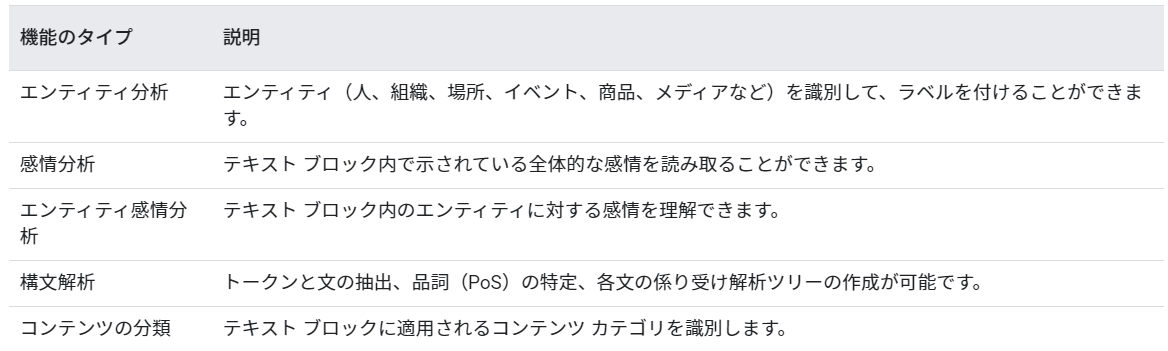

In [6]:
!pip install --upgrade google-cloud-language

     |████████████████████████████████| 153kB 17.8MB/s eta 0:00:01
     |████████████████████████████████| 522kB 31.2MB/s eta 0:00:01
     |████████████████████████████████| 102kB 51.4MB/s ta 0:00:01
     |████████████████████████████████| 51kB 37.6MB/s eta 0:00:01
     |████████████████████████████████| 645kB 37.1MB/s eta 0:00:01
     |████████████████████████████████| 143kB 70.2MB/s eta 0:00:01
     |████████████████████████████████| 204kB 66.9MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 76.6MB/s eta 0:00:01
     |████████████████████████████████| 40kB 31.9MB/s eta 0:00:01
     |████████████████████████████████| 4.1MB 78.3MB/s eta 0:00:01
     |████████████████████████████████| 163kB 87.2MB/s eta 0:00:01
     |████████████████████████████████| 81kB 44.6MB/s eta 0:00:01
ERROR: chainer 6.4.0 has requirement protobuf<3.8.0rc1,>=3.0.0, but you'll have protobuf 3.15.8 which is incompatible.
ERROR: chainer 6.4.0 has requirement typing-extensions<=3.6.6, but you'll have ty

In [9]:
# Jsonファイル（APIのキーとなる）の設定
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="____ここにJsonファイルの場所を入力する_____"

In [10]:
from google.cloud import language_v1

# クライアントの定義
client = language_v1.LanguageServiceClient()

# 試しにcallしてみる
text = u"Hello, world!"
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

Text: Hello, world!
Sentiment: 0.6000000238418579, 0.6000000238418579


In [11]:
#サンプルのレビュー
df["review"][0]

'今やもうFBの本体自体は過去のSNSとなりつつあるけど、その構造は色々なプラットフォームに血として流れてる。何よりこの時代を塗り替えていくユース世代のワルダクミ感、とても良いですね！見てるとワクワクします。'

In [13]:
# このレビューのスコアは 3.7 / 5.0
text = df["review"][0]
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

Text: 今やもうFBの本体自体は過去のSNSとなりつつあるけど、その構造は色々なプラットフォームに血として流れてる。何よりこの時代を塗り替えていくユース世代のワルダクミ感、とても良いですね！見てるとワクワクします。
Sentiment: 0.5, 2.0999999046325684


#### 各数値の内容はこちら
- magnitudeは強度をします指標、 0～∞ の数値で表現し、negaやposi関係ない
- scoreは単純にsentiment（感情）を表す指標 -1がnegaで1がposi  
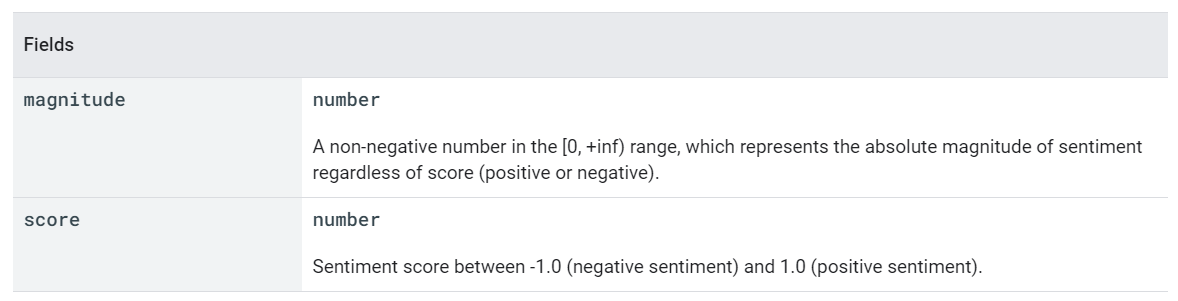

In [14]:
# もう一つ見てみましょう
# このレビューのスコアは 3.6 / 5.0
text = df["review"][100]
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

Text: Facebook今や世界で利用されている大手SNS、Facebookの誕生と創設者マーク・ザッカーバーグについて描く。ノンフィクションかと思ってたら結構脚色されてるらしい。実際は劇中でも重要人物なエリカが存在しないなんて…！実話とは違う部分も多いけれど、それとは別に映画として、エンタメ作品として面白かったです。主演のジェシー・アイゼンバーグの演技がよかった！言葉足らずな故孤独な天才、オタク特有の早口とか。ジャスティン・ティンバーレイクとの天才対談は凡人の私にはついてけない笑
Sentiment: 0.20000000298023224, 3.4000000953674316


In [17]:
# negaのレビューも確認してみます
# このレビューのスコアは 1.8 / 5.0
text = df["review"][390]
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

Text: とにかく軽妙なやりとりとタガを外した行動。本当ならやっぱりアメリカは凄いやとなるんだけど、ハリウッドの演出は毎度同じで飽きませんか？
Sentiment: 0.0, 0.10000000149011612


In [18]:
# さらにnegaは？
# このレビューのスコアは 1.0 / 5.0
text = df["review"][1426]
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

Text: Facebookの利便性、必要性は分からない。ネットの世界で成功するのは、こういう人が多いのかな。発想は長けているのに、友情が続かない。何も残らなかった。
Sentiment: -0.4000000059604645, 1.899999976158142


### 簡易考察
- APIでは-1から+1での極性表示なので、1.0-5.0への値へマッピングする必要はある
- 宇宙戦争と比べて感想があいまいな（posiともnegaとも取れる）内容が多そうなため、精度は下がりそう

### ここからさらに分析と学習に入っていく。まず形態素解析をしてみる

In [7]:
# 共通の講義でも説明したが、形態素解析として文章を形態素（≠単語の場合もある）に分割する
#　利用の目的としては、主に形態素に付与されている品詞を使って、必要な情報でのみで学習することを目的とする
# 今回はsudachiを使う（他にもMeCabやJanome, GINZA, Juman++など、種類があるので確認してみること）
# 今回の選択理由はinstallがとても簡単だから
!pip install sudachipy

     |████████████████████████████████| 71kB 14.6MB/s eta 0:00:01
     |████████████████████████████████| 481kB 24.7MB/s eta 0:00:01
  Created wheel for sudachipy: filename=SudachiPy-0.5.2-cp36-cp36m-linux_x86_64.whl size=888140 sha256=a0bffe8f83fadde783b66189454b9d543ebc85192ef9dec4ef39ebf9fe06166f
  Stored in directory: /root/.cache/pip/wheels/f1/cc/90/8c68725c622127bb3e5dc46756a8c03bd548dc6d756e66c72d
Successfully built sudachipy
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
# 辞書のisntall
!pip install sudachidict_core

  Created wheel for sudachidict-core: filename=SudachiDict_core-20201223.post1-cp36-none-any.whl size=71405682 sha256=bf354c04514b3a8d02a1e53c66197da0aeafb674d1b6af9dc566c0942a9d3ed3
  Stored in directory: /root/.cache/pip/wheels/d4/f8/ff/f9465f9313f865acb1c5500f4d538c470b163b674e184a90d7
Successfully built sudachidict-core
You should consider upgrading via the 'pip install --upgrade pip' command.


### sudachiのReadme
- https://github.com/WorksApplications/Sudachi/blob/develop/README.md#sudachi-%E6%97%A5%E6%9C%AC%E8%AA%9Ereadme
- https://github.com/WorksApplications/SudachiPy

In [9]:
# 確認してみよう
# モードによって、結果が異なる
from sudachipy import tokenizer
from sudachipy import dictionary

tokenizer_obj = dictionary.Dictionary().create()

mode = tokenizer.Tokenizer.SplitMode.C
[m.surface() for m in tokenizer_obj.tokenize("国家公務員", mode)]
# => ['国家公務員']

['国家公務員']

In [10]:
mode = tokenizer.Tokenizer.SplitMode.B
[m.surface() for m in tokenizer_obj.tokenize("国家公務員", mode)]
# => ['国家', '公務員']

['国家', '公務員']

In [11]:
mode = tokenizer.Tokenizer.SplitMode.A
[m.surface() for m in tokenizer_obj.tokenize("国家公務員", mode)]
# => ['国家', '公務', '員']

['国家', '公務', '員']

In [12]:
# 今回のデータにスティーブンスピルバーグは2単語（もちろん辞書に登録されてないであろう）
mode = tokenizer.Tokenizer.SplitMode.C
[m.surface() for m in tokenizer_obj.tokenize("スティーブンスピルバーグ", mode)]

['スティーブン', 'スピルバーグ']

In [13]:
# 一般的な人名として、固有名詞として認識されている
[m.part_of_speech() for m in tokenizer_obj.tokenize("スティーブンスピルバーグ", mode)]

[['名詞', '固有名詞', '人名', '一般', '*', '*'], ['名詞', '固有名詞', '人名', '一般', '*', '*']]

In [14]:
# 例えば、下記は普通名詞として認識されているが、世間ではマツコデラックスが人名（固有名詞）として認識されている
# これらを固有名詞として認識したい場合は、使用している辞書のメンテンスを個人が行うか
# すでにこれらがメンテナンスされている辞書を利用する必要がある（NEologdなどは辞書のメンテンスが盛ん）
# このような観点からもツールを選ぶ必要がある
[m.part_of_speech() for m in tokenizer_obj.tokenize("マツコデラックス", mode)]

[['名詞', '普通名詞', '一般', '*', '*', '*']]

In [15]:
def wakati_by_sudachi(text):
    """
    分かち書き
    """
    mode = tokenizer.Tokenizer.SplitMode.C #モードCの一番長い形で分ける
    results =[m.surface() for m in tokenizer_obj.tokenize(text, mode)]
    word_list = []
    for mrph in results:
        if not (mrph == ""): #何故か分かち書きの結果として空白データ（''）ができたための省く処理
            seikika = tokenizer_obj.tokenize(mrph,mode)[0].normalized_form() #正規化（標準化？）してなるべく言葉の揺れを無くす　e.g. 打込む → 打ち込む かつ丼 → カツ丼
            hinsi = tokenizer_obj.tokenize(seikika,mode)[0].part_of_speech()[0]
            if hinsi in  ["名詞", "動詞", "形容詞"]:  # 対象とする品詞を指定
                word = tokenizer_obj.tokenize(seikika,mode)[0].dictionary_form()
                word_list.append(word)
    return " ".join(word_list) #スペースで繋げていく

In [16]:
%%time
# 形態素解析に少し時間かかる(2~3分)
from tqdm import tqdm_notebook as tqdm
wakati_list=[]
for lines in tqdm(df["review"]):
    wakati_list.append(wakati_by_sudachi(lines))


CPU times: user 1min 31s, sys: 10 s, total: 1min 41s
Wall time: 1min 29s


In [18]:
#確認、絵文字が目立つので削除しましょう
wakati_list[0:10]

['今 fb 本体 自体 過去 SNS 有る 構造 プラットフォーム 血 流れ 時代 塗り替え 行く ユース 世代 ワルダクミ 感 良い 見る',
 '社会 期待 男性 性 行く 無い 人 言う 意味 ジェシー アイゼンバーグ マーク ザッカーバーグ フィン チャー 的 主人公 思う アーミー 二人 アミハマ 見た目 使 望む 男性 性 画一的 有る こと 表わす フィン チャー 映画 出 来る マスキュリニティ 行く 無い 男 マスキュリニティ 行く 無い 男 変 美化 無い 旨い 所 思う 冒頭 言う 良い ナード 社交 下手 実 素晴らしい 性格 善良 人間 差す 言葉 無い 全員 ピーター パーカ 訳 無い 忘れる 勝ち 私達 危うい 忘れる 成る 時 有る 今 見る 台詞 量 シェークスピア 劇 字幕 追う 精一杯 所 有る アンドリュー ガーフィールド 動き キレ 良 良い 思う ジェシー アイゼンバーグ 記憶 限り 脳味噌 考 演ずる タイプ 役者 微動 無い 言う こと 出来る 俳優 好み',
 '一切 飽きる 無い 面白い のめり込む 増し テンポ スピード感 情報量 最高 映画 構成 楽曲 素晴らしい ✨ 作曲 賞 受賞 納得 凄い 作品 出来 増し 自分 ペース 進む 行く',
 'Facebook 訴訟 問題 実話 ベース ドキュメンタリー 仕舞う 欠伸 仕舞い 物語 賢い 人 早口 変人 振り 化ける 周囲 軋轢 テンポ 良い 見る エンタメ 辛い 所 音楽 マネー ゲーム 駆使 友情 拗らせる 訴訟 大国 1 事案',
 'Facebook 作る 話 思う 作る 話 遣る 作る こと 思う 運営 方 思う 人 裏 見える 来る',
 'インターンシップ ソーシャル ネットワーク 順番 逆 マーク ザッカーバーグ 感じ 人 知る 無い 気分 良い 無い 映画 Facebook やめる 良い 思う 仕舞う gafa こと IT システム 構築 詳しい 無い 人 タレント 知識 有る 人 残る 行く 柵 外 見る',
 'ジェシー 第 4 弾 役 頭 回転 早い 賢い やばい 方向 自ら 踏み込む 行く 良い 役 嵌まる 過ぎる 気持ち 良い 早口 感 満載 一々 相手 間 障る 良い こと 言う 所 良い キャラ ハーバード大学 通う マーク

In [19]:
!pip install emoji --upgrade

     |████████████████████████████████| 133kB 16.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
# emojiのパッケージ辞書を使って、emojiを一層してみる
import emoji
wakati_list_ne = []
for words in wakati_list:
    wakati_list_ne.append(''.join(['' if c in emoji.UNICODE_EMOJI["en"] else c for c in words]))

In [21]:
# 一部削除しきれていないが、一旦はここまでとする
wakati_list_ne[0:10]

['今 fb 本体 自体 過去 SNS 有る 構造 プラットフォーム 血 流れ 時代 塗り替え 行く ユース 世代 ワルダクミ 感 良い 見る',
 '社会 期待 男性 性 行く 無い 人 言う 意味 ジェシー アイゼンバーグ マーク ザッカーバーグ フィン チャー 的 主人公 思う アーミー 二人 アミハマ 見た目 使 望む 男性 性 画一的 有る こと 表わす フィン チャー 映画 出 来る マスキュリニティ 行く 無い 男 マスキュリニティ 行く 無い 男 変 美化 無い 旨い 所 思う 冒頭 言う 良い ナード 社交 下手 実 素晴らしい 性格 善良 人間 差す 言葉 無い 全員 ピーター パーカ 訳 無い 忘れる 勝ち 私達 危うい 忘れる 成る 時 有る 今 見る 台詞 量 シェークスピア 劇 字幕 追う 精一杯 所 有る アンドリュー ガーフィールド 動き キレ 良 良い 思う ジェシー アイゼンバーグ 記憶 限り 脳味噌 考 演ずる タイプ 役者 微動 無い 言う こと 出来る 俳優 好み',
 '一切 飽きる 無い 面白い のめり込む 増し テンポ スピード感 情報量 最高 映画 構成 楽曲 素晴らしい  作曲 賞 受賞 納得 凄い 作品 出来 増し 自分 ペース 進む 行く',
 'Facebook 訴訟 問題 実話 ベース ドキュメンタリー 仕舞う 欠伸 仕舞い 物語 賢い 人 早口 変人 振り 化ける 周囲 軋轢 テンポ 良い 見る エンタメ 辛い 所 音楽 マネー ゲーム 駆使 友情 拗らせる 訴訟 大国 1 事案',
 'Facebook 作る 話 思う 作る 話 遣る 作る こと 思う 運営 方 思う 人 裏 見える 来る',
 'インターンシップ ソーシャル ネットワーク 順番 逆 マーク ザッカーバーグ 感じ 人 知る 無い 気分 良い 無い 映画 Facebook やめる 良い 思う 仕舞う gafa こと IT システム 構築 詳しい 無い 人 タレント 知識 有る 人 残る 行く 柵 外 見る',
 'ジェシー 第 4 弾 役 頭 回転 早い 賢い やばい 方向 自ら 踏み込む 行く 良い 役 嵌まる 過ぎる 気持ち 良い 早口 感 満載 一々 相手 間 障る 良い こと 言う 所 良い キャラ ハーバード大学 通う マーク 

### nlplotを使って、データの特色を確認してみる

- nlplotとは、手軽に言語データの可視化を行ってくれるライブラリ
- ビジュアルライブラリとしてはplotlyやbokehを使えば、カスタマイズされた描画も可能だが、手間をかけたくない場合などに  
https://www.takapy.work/entry/2020/05/17/192947

In [22]:
!pip install nlplot

     |████████████████████████████████| 972kB 13.1MB/s eta 0:00:01
     |████████████████████████████████| 1.7MB 64.2MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 23.9MB 69.2MB/s eta 0:00:01
     |████████████████████████████████| 368kB 62.3MB/s eta 0:00:01
     |████████████████████████████████| 13.2MB 48.6MB/s eta 0:00:01
     |████████████████████████████████| 471kB 61.5MB/s eta 0:00:01
     |████████████████████████████████| 61kB 38.2MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp36-none-any.whl size=136870 sha256=5547875da07e15f064d1b958552d3c97ae520e95c06fe82b6f5928da845f25c9
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl

In [23]:
#最新だと動かないのでversionをdownさせる
!pip install pyLDAvis==3.2.0

     |████████████████████████████████| 1.7MB 16.3MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.0-py2.py3-none-any.whl size=136694 sha256=1a0c83fc07f756d873ce5c837b6802732629d2c99d3ffc54922e0b89e3303af2
  Stored in directory: /root/.cache/pip/wheels/5e/62/9d/e2d11b7e09f85508b7be451fa35a2bce4b12c66c10b8bcb182
Successfully built pyLDAvis
  Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1
You should consider upgrading via the 'pip install --upgrade pip' command.


In [24]:
# Dataframeに現状の形態素結果を結合する
df["review_keitaiso"] = wakati_list_ne

In [25]:
df.head()

create_time score  reaction_num  \
0  2021/03/18 08:16   3.7             0   
1  2021/03/17 19:39     -             1   
2  2021/03/17 16:49   4.8             1   
3  2021/03/17 15:25   3.6             0   
4  2021/03/17 12:04   3.4             0   

                                              review  \
0  今やもうFBの本体自体は過去のSNSとなりつつあるけど、その構造は色々なプラットフォームに血...   
1  社会から期待される男性性についていけない人、という意味でジェシーアイゼンバーグのマークザッカ...   
2  一切飽きない。めちゃくちゃ面白くのめり込みました…。テンポ、スピード感、そしてこの情報量の多...   
3  Facebookの訴訟問題を実話ベースで。とにかく、ドキュメンタリーにしてしまうとあくびして...   
4  Facebookを作るまでの話かと思ったら作ってからのいろいろの話やった作ることも大変やと思...   

                                     review_keitaiso  
0  今 fb 本体 自体 過去 SNS 有る 構造 プラットフォーム 血 流れ 時代 塗り替え ...  
1  社会 期待 男性 性 行く 無い 人 言う 意味 ジェシー アイゼンバーグ マーク ザッカー...  
2  一切 飽きる 無い 面白い のめり込む 増し テンポ スピード感 情報量 最高 映画 構成 ...  
3  Facebook 訴訟 問題 実話 ベース ドキュメンタリー 仕舞う 欠伸 仕舞い 物語 賢...  
4  Facebook 作る 話 思う 作る 話 遣る 作る こと 思う 運営 方 思う 人 裏 ...

In [26]:
import nlplot
#事前にデータを読み込む
npt = nlplot.NLPlot(df, target_col='review_keitaiso')
npt_reaction = nlplot.NLPlot(df.query('reaction_num > 0'), target_col='review_keitaiso')

/usr/local/lib/python3.6/dist-packages/gensim/similarities/__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.



In [30]:
# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
# 今回は上位2単語をストップワードに指定
stopwords = npt.get_stopword(top_n=2, min_freq=0)

In [29]:
# 本来であれば、インタラクティブに結果の確認が可能であるが、環境の都合により
# htmlの掃き出した結果で確認(unigram)
out = npt.bar_ngram(
    title='sns_uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    stopwords=stopwords,
    save=True
)

100%|██████████| 2753/2753 [00:00<00:00, 66657.73it/s]


In [31]:
# htmlの掃き出した結果で確認(bigram)
out = npt.bar_ngram(
    title='sns_bi-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
    stopwords=stopwords,
    save=True
)

100%|██████████| 2753/2753 [00:00<00:00, 45482.34it/s]


#### バイグラムやユニグラムの結果をみてストップワードの機能は決定する
- （自分で考えてみてください）

In [32]:
# 一応reactionがついているレビューのみでも確認する
out = npt_reaction.bar_ngram(
    title='sns_bi-gram_reaction',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
    stopwords=stopwords,
    save=True
)

100%|██████████| 1911/1911 [00:00<00:00, 38604.58it/s]


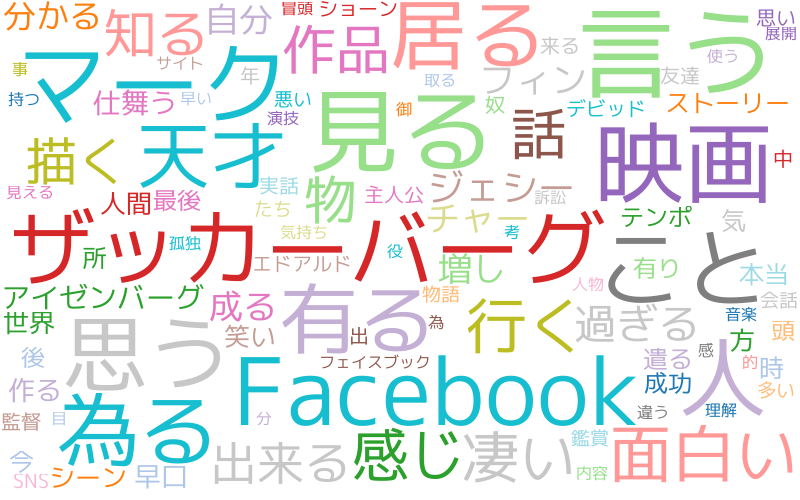

In [33]:
# ワードクラウド（正直あまり使えません）
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stopwords,
)


In [34]:
# ビルド（データ件数によっては処理に時間を要します）
npt.build_graph(stopwords=stopwords, min_edge_frequency=25)
out = npt.co_network(title='sns_occurrence_network',save=True)

node_size:349, edge_size:5584


- htmlで開くとこのようなイメージが開けるはず（下記は画像）
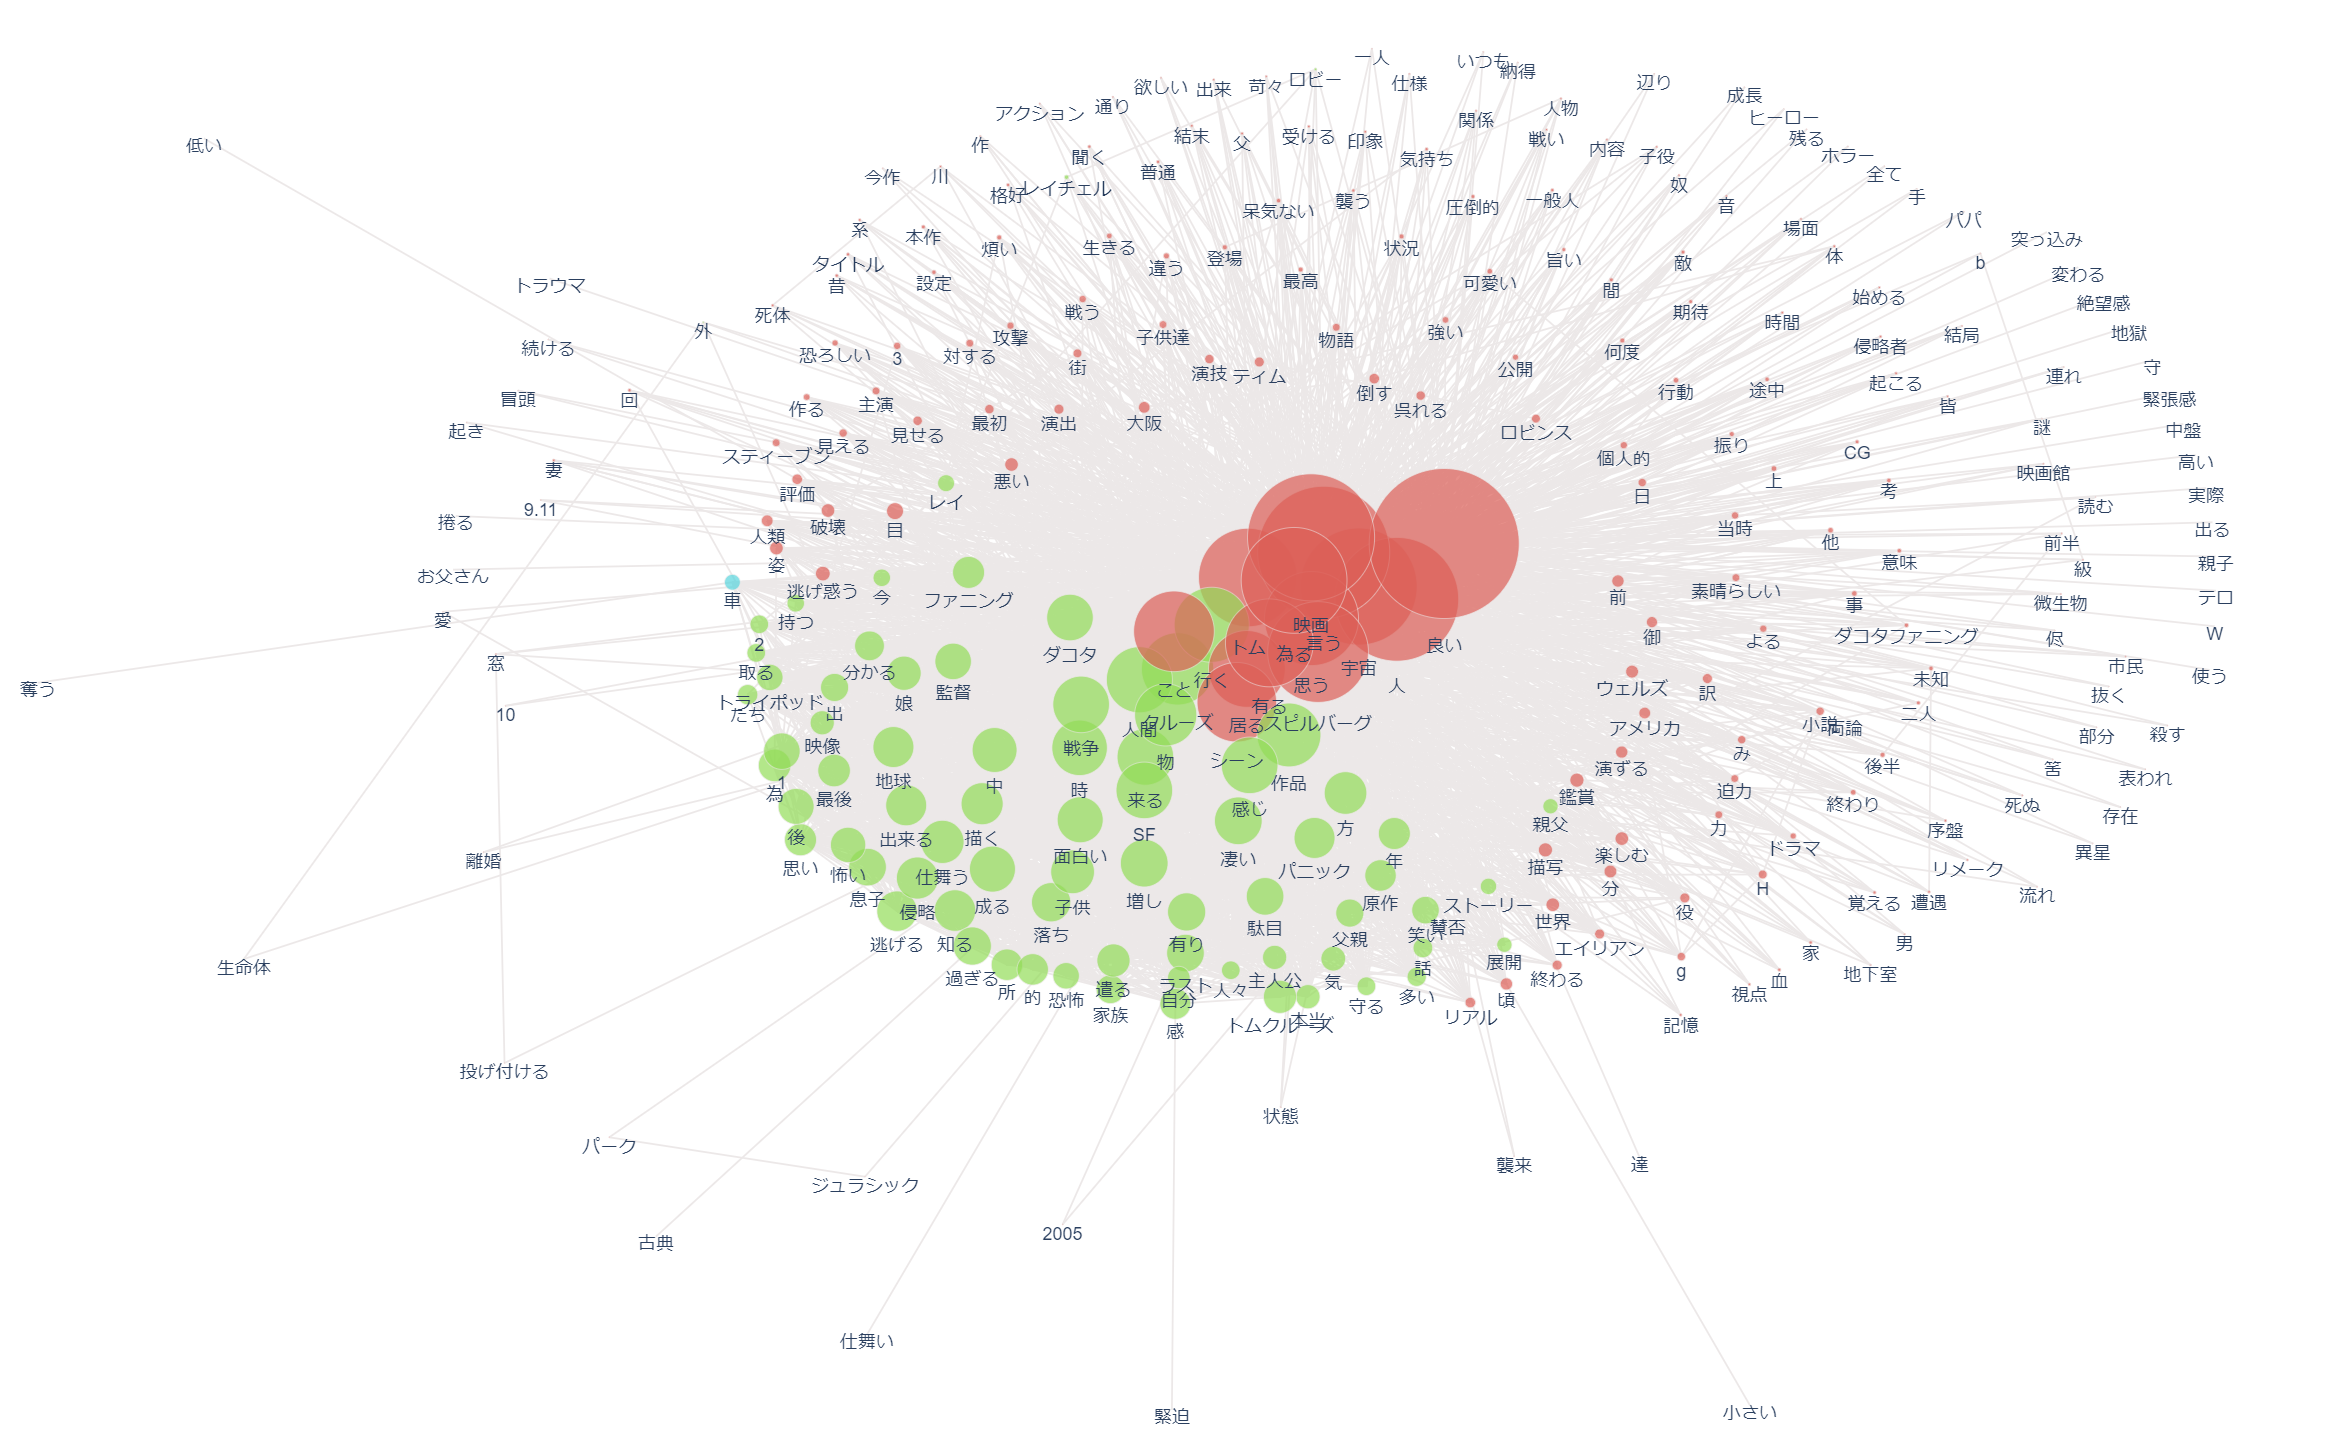

In [35]:
# サンバーストチャートでも表示
out = npt.sunburst(title='sns_sunburst_chart',save=True)

In [55]:
# pyLDAvis (時間がかかりすぎるので実施しない)
#import pyLDAvis
#pyLDAvis.enable_notebook()
#out = npt.ldavis(num_topics=5, passes=5)

- ほかにも公開されているストップワードを使って、データを編集するなどいくつか方法はある  
http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt


In [37]:
# ユニグラムとバイグラムとして頻度が多かったwordは対象から除外処理を行う
wakati_list_nstop = []
wakati_list_nstop_spl = []
for words in wakati_list_ne:
    
    #ここは自分で考えてみる（ストップワードとして削除すべきワード）
    text = words.replace('マーク ザッカーバーグ','')
    #text = words.replace('宇宙 人 ',"").replace('トム クルーズ ',"").replace('宇宙 戦争 ',"").replace('ダコタ ファニング ',"").replace('スピルバーグ 監督 ',"").replace("トムクルーズ ", "").replace("スピルバーグ ", "")
    
    #Dataframeに格納できる用に格納
    wakati_list_nstop.append(text)
    #gensimで使用する用
    wakati_list_nstop_spl.append(text.split(" "))

In [38]:
# 再度 Dataframeに現状の形態素結果を結合する
df["review_keitaiso"] = wakati_list_nstop

In [39]:
df.head()

create_time score  reaction_num  \
0  2021/03/18 08:16   3.7             0   
1  2021/03/17 19:39     -             1   
2  2021/03/17 16:49   4.8             1   
3  2021/03/17 15:25   3.6             0   
4  2021/03/17 12:04   3.4             0   

                                              review  \
0  今やもうFBの本体自体は過去のSNSとなりつつあるけど、その構造は色々なプラットフォームに血...   
1  社会から期待される男性性についていけない人、という意味でジェシーアイゼンバーグのマークザッカ...   
2  一切飽きない。めちゃくちゃ面白くのめり込みました…。テンポ、スピード感、そしてこの情報量の多...   
3  Facebookの訴訟問題を実話ベースで。とにかく、ドキュメンタリーにしてしまうとあくびして...   
4  Facebookを作るまでの話かと思ったら作ってからのいろいろの話やった作ることも大変やと思...   

                                     review_keitaiso  
0  今 fb 本体 自体 過去 SNS 有る 構造 プラットフォーム 血 流れ 時代 塗り替え ...  
1  社会 期待 男性 性 行く 無い 人 言う 意味 ジェシー アイゼンバーグ  フィン チャー...  
2  一切 飽きる 無い 面白い のめり込む 増し テンポ スピード感 情報量 最高 映画 構成 ...  
3  Facebook 訴訟 問題 実話 ベース ドキュメンタリー 仕舞う 欠伸 仕舞い 物語 賢...  
4  Facebook 作る 話 思う 作る 話 遣る 作る こと 思う 運営 方 思う 人 裏 ...

### TF-IDFを用いて、ベクトル化を行いモデルの学習を実行してみる

In [40]:
# 出現ワードの辞書を作成
from gensim import corpora
dic = corpora.Dictionary(wakati_list_nstop_spl)
print(len(dic))

# 「出現頻度が10未満の単語」と「30%以上の文書で出現する単語」を排除
dic.filter_extremes(no_below = 10, no_above = 0.3)
bow_corpus = [dic.doc2bow(d) for d in wakati_list_nstop_spl]

# 辞書の保存
dic.save_as_text('./sns_dic.txt')

8532


In [41]:
# TFIDFモデルの作成と適用
from gensim import models

tfidf_model = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

In [42]:
# LSIモデルの作成
# num_topicsは 1.0-5.0までの0.1刻みで約40個にしたいが、時間がかかるので10に設定
# num_topicsはトピックモデルのパラメータ扱い
dime = 10
lsi_model = models.LsiModel(tfidf_corpus, id2word = dic, num_topics = dime)
lsi_corpus = lsi_model[tfidf_corpus]

In [43]:
# gensimコーパスからdenseへ（行列への変換）
from gensim import matutils
all_dense = list(matutils.corpus2dense(lsi_corpus, num_terms=dime, num_docs=len(wakati_list_nstop_spl)).T) 

### SVR(サポートベクター回帰を使って学習してみる

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



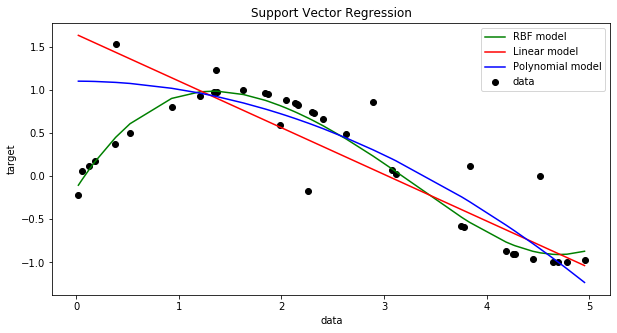

In [44]:
#下記はサンプルデータを使って、デモ表示してみる
# SVR（サポートベクター回帰）
# SVRの中でもカーネルに種類がある
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

# インプットを乱数で生成
X = np.sort(5 * np.random.rand(40, 1), axis=0)
# アウトプットはsin関数
y = np.sin(X).ravel()

# アウトプットにノイズを与える
y[::5] += 3 * (0.5 - np.random.rand(8))

# RBFカーネル、線形、多項式でフィッティング
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# 図を作成
plt.figure(figsize=[10, 5])
plt.scatter(X, y, c='k', label='data')
plt.plot(X, y_rbf, c='g', label='RBF model')
plt.plot(X, y_lin, c='r', label='Linear model')
plt.plot(X, y_poly, c='b', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [45]:
# SVR を使って、今回のモデル学習を行う
# 結果としては内容
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV

#トレーニング・テストデータの設定
score = df["score"].replace("-","0")
train_data, test_data, train_label, test_label = train_test_split(all_dense, score, test_size=0.2, random_state=1)

#データの標準化
sc = StandardScaler()
sc.fit(all_dense)
train_std = sc.transform(train_data)
test_std = sc.transform(test_data)

In [46]:
%%time
# time等で時間を測りながら学習を進める
# ハイパーパラメータ調整
#cpu-4で回して5分ぐらいかかるので、パラメータ等は適宜修正する
params = {'kernel': ['linear'],'gamma': [1e-3, 1e-4],'C': [1, 10, 100]}
svr_clf = RandomizedSearchCV(SVR(),params, cv=5, iid=True,return_train_score=False)
svr_clf.fit(train_std, train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.



CPU times: user 5min 9s, sys: 0 ns, total: 5min 9s
Wall time: 5min 9s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid=True, n_iter=10, n_jobs=None,
                   param_distributions={'C': [1, 10, 100],
                                        'gamma': [0.001, 0.0001],
                                        'kernel': ['linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [47]:
# 学習の結果を表示
# パラメータチューニングしてもあまり効果がなさそう（データの分布が悪い？）
result_df = pd.DataFrame(svr_clf.cv_results_)
result_df.sort_values(
    by="rank_test_score", inplace=True)
print(result_df[["rank_test_score", 
                 "params", 
                 "mean_test_score"]])

   rank_test_score                                           params  \
2                1    {'kernel': 'linear', 'gamma': 0.001, 'C': 10}   
3                1   {'kernel': 'linear', 'gamma': 0.0001, 'C': 10}   
0                3     {'kernel': 'linear', 'gamma': 0.001, 'C': 1}   
1                3    {'kernel': 'linear', 'gamma': 0.0001, 'C': 1}   
4                5   {'kernel': 'linear', 'gamma': 0.001, 'C': 100}   
5                5  {'kernel': 'linear', 'gamma': 0.0001, 'C': 100}   

   mean_test_score  
2        -0.034743  
3        -0.034743  
0        -0.034809  
1        -0.034809  
4        -0.034858  
5        -0.034858  


In [48]:
#スコアの表示(寄与率としてめちゃくちゃ低い)
score = svr_clf.score(test_std, test_label)
print("{:.3g}".format(score))

-0.0379


In [49]:
#他のモデルも簡易に実施できるの例として
#SGD Regressorの場合
sgd_clf = SGDRegressor(max_iter=1000)
sgd_clf.fit(train_std, train_label)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [50]:
#スコアの表示
score = sgd_clf.score(test_std, test_label)
print("{:.3g}".format(score))

0.0185


### XGBoostに加えて、lightGBMを調べて使てみる

In [51]:
#xgboostのinstall
!pip install xgboost

     |████████████████████████████████| 157.5MB 344kB/s  eta 0:00:01    |█████                           | 25.1MB 19.0MB/s eta 0:00:07
You should consider upgrading via the 'pip install --upgrade pip' command.


In [52]:
%%time
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# 学習データからXGBoost用のデータを生成
# モデルのインスタンス作成
XG_clf = xgb.XGBRegressor()
clf_cv = GridSearchCV(XG_clf, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)
clf_cv.fit(train_std, train_label)
print(clf_cv.best_params_, clf_cv.best_score_)

# 改めて最適パラメータで学習
XG_clf = xgb.XGBRegressor(**clf_cv.best_params_)
XG_clf.fit(train_std, train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'max_depth': 2, 'n_estimators': 50} -0.048852448889772214
CPU times: user 20.5 s, sys: 0 ns, total: 20.5 s
Wall time: 6.88 s


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.8s finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [53]:
# テストデータに対して予測結果をRMSEで出力する
pred = XG_clf.predict(test_std)
rmse = np.sqrt(mean_squared_error(test_label, pred))
print("予測したモデルのrmse: " + str(rmse))

予測したモデルのrmse: 1.1514690359834947


- 学習するデータの形式やテストデータの形式は整っているので、lightGBMやCatBioostの使い方を調べて各自適用してみる
- （ライブラリをインストールして、既存データをモデルフィットを行えれば推論することは可能）

### データと突き合わせして、推論結果を確認してみる

In [61]:
#test用のデータ
test_review =["内容は平凡でよくわからなかった",
              "内容としては微妙だったし、キャストも最低だったので評価は低い。もう見ることはないだろう"]

In [62]:
# 形態素解析
from tqdm import tqdm_notebook as tqdm
test_wakati_list=[]
for lines in tqdm(test_review):
    test_wakati_list.append(wakati_by_sudachi(lines).split(" "))

In [63]:
test_bow_corpus = [dic.doc2bow(d) for d in test_wakati_list]
test_tfidf_corpus = tfidf_model[test_bow_corpus]
test_lsi_corpus = lsi_model[test_tfidf_corpus]

dime = 10
test_dense = list(matutils.corpus2dense(test_lsi_corpus, num_terms=dime).T)
test_txt = sc.transform(test_dense)

In [64]:
#SVRモデルの推論結果
result = svr_clf.predict(test_txt)
print(result)

[3.58926691 3.60842355]


In [65]:
#SGD Regressorモデルの推論結果
result = sgd_clf.predict(test_txt)
print(result)

[3.40159772 3.22944051]


In [66]:
#XGBoostモデルの推論結果
result = XG_clf.predict(test_txt)
print(result)

[3.274147  3.1264145]


### 考察（自分で考えてみましょう）
- （データに対してモデルの状態はどうか）
-　(モデルを作成するにあたり、何が困難になる可能性が高いか)
